# Planning challenge Quantum workshop
1. [Problem statement](#problem-statement)
2. [System Prerequisites](#prerequisites)
3. [System Setup](#system-setup)
   1. [Editor](#editor)
   2. [Add-ons](#editor-addons)
   3. [pyenv](#pyenv-setup)
      1. [MacOS-Linux](#pyenv-unixes)
      2. [Windows](#pyenv-win)
   4. [pipx](#pipx-setup)
   5. [pipenv](#pipenv-setup)
   6. [Install dependencies](#installing-dependencies)
   7. [Install quality tools](#installing-quality)
   8. [Linting the current code](#linting)
4. [Quantum approach](#quantum-approach)
5. [Execution on remote backends (simulators and actual quantum machines)](#remote-backends)
   1. [IBM Quantum](#ibm-backend)
   2. [AWS Braket](#aws-backend)
   3. [Quantum Inspire](#inspire-backend)

## Problem Statement <a id="problem-statement"></a>

Here we want to elaborate a little on the problem, the approach and the reasoning.

## System Prerequisites <a id="prerequisites"></a>

The only prerequisite to set up the workshop is [git](https://git-scm.com/) since the approach taken to install the python interpeter manager [pyenv](https://github.com/pyenv/pyenv), is based on git.

## System Setup <a id="system-setup"></a>

The following instructions will guide through the full setup of the workshop in a deterministic and reproducible manner. If a user is advanced and knows how things are working they can choose an alternative approach, tool or setup.

### Editor <a id="editor"></a>

The suggested editor to use is [vscode](https://code.visualstudio.com/). Please use your prefered method of installation according to your tastes and operating system.

### Editor addons <a id="editor-addons"></a>

On [vscode](https://code.visualstudio.com/) the addons used for this workshop are [jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter) to use the actuall notebook and optionally [aws-toolkit](https://marketplace.visualstudio.com/items?itemName=AmazonWebServices.aws-toolkit-vscode) if you are interested in executing the code on AWS.

Please install the jupiter plugin from the above link.

### Python interpreter manager (pyenv) <a id="pyenv-setup"></a>

We are using pyenv to manage multiple python versions and pin a specific one for this workwhop. Please follow the instructions per your operating system.

#### pyenv on MacOS/Linux <a id="pyenv-unixes"></a>

Please use the basic git check out checkout way, do not use `brew` (On mac OS) 
You can find details [here](https://github.com/pyenv/pyenv#basic-github-checkout)

After you complete the checkout and set up your shell accordingly, please make sure to install the [system prerequisites](https://github.com/pyenv/pyenv/wiki#suggested-build-environment) (according to the operating system you are on) to be able to install a python interpreter.

Once the above steps are completed (the system dependencies will take some time) and you have actually [configured pyenv in your shell](https://github.com/pyenv/pyenv#set-up-your-shell-environment-for-pyenv) you can install a python interpreter via pyenv like

```bash
    pyenv install 3.10.8
```

Once that step is completed (it will also take a long time, go grab a coffee) you can activate this python interpreter as your default one system wide like

```bash
    pyenv global 3.10.8
```

after this point in a new shell if you start python you will see

```bash
    python

Python 3.10.8 (main, Dec  4 2022, 10:23:05) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
Type "help", "copyright", "credits" or "license" for more information.

>>> exit()
```

exit the interpreter.

#### pyenv on Windows <a id="pyenv-win"></a>

Use the [windows port](https://github.com/pyenv-win/pyenv-win#installation) of pyenv and install with your preferred method (Probably [powershell?](https://github.com/pyenv-win/pyenv-win/blob/master/docs/installation.md#powershell)).


```bash
    pyenv install 3.10.8
```

Once that step is completed (it will also take a long time, go grab a coffee) you can activate this python interpreter as your default one system wide like

```bash
    pyenv global 3.10.8
```

after this point in a new shell if you start python you will see

```bash
    python.exe

Python 3.10.8 (main, Dec  4 2022, 10:23:05) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
Type "help", "copyright", "credits" or "license" for more information.

>>> exit()
```

exit the interpreter.

### [pipx](https://pipx.pypa.io/stable/) Install and Run Python Applications in Isolated Environments <a id="pipx-setup"></a>

On windows you need to add the `.exe` extensions to all commands shown below.

update pip and install pipx

```bash
    pip install -U pip pipx  # pip.exe install -U pip pipx (for windows)
```

Make sure that pipx is properly activated on your environment

```bash
    pipx ensurepath  # pipx.exe ensurepath (for windows)
```


### [pipenv](https://pipenv.pypa.io/en/latest/) Python virtualenv management tool and package manager <a id="pipenv-setup"></a>

using pipx we can install pipenv

```bash
    pipx install pipenv  # pipx.exe install pipenv (for windows)
```

### Configure pipenv for the appropriate python version and setting for local virtual environment

MacOS/Linux

```bash
export PIPENV_DEFAULT_PYTHON_VERSION=$(pyenv which python)
export PIPENV_PYTHON=`pyenv version | cut -d" " -f1`
export PIPENV_VENV_IN_PROJECT=true
```

Windows  #TODO fix the windows environment variable export

```powershell
$env:PIPENV_DEFAULT_PYTHON_VERSION=#TODO
$env:PIPENV_PYTHON=#TODO
$env:PIPENV_VENV_IN_PROJECT=true
```

Do not forget to select your interpreter (kernel) before running the other cells in the notebook!


#### OS module is needed for all executions of code below so we import here

In [4]:
import os

### Install all required dependencies for the workshop <a id="installing-dependencies"></a> (in a shell execute)

```bash
pipenv install --dev
```

### Install linters for quality <a id="installing-quality"></a>

In [5]:
os.system('pipenv install --categories quality')

### Lint the current code and sort imports <a id="linting"></a>

In [6]:
import os

commands = ('isort', 'nblint', 'ruff')

for command in commands:
    print(f'Running {command}')
    print(os.system(f'pipenv run {command}'))

## Classical Approach <a id="classical-approach"></a>

### Import the linear programming constructs from Pulp

In [7]:
from pulp import LpBinary, LpMinimize, LpProblem, LpVariable, lpSum
from pulp import value as pulp_value

### Flag to turn on/off the optimization for equal distribution

In [8]:
optimize_for_equal_distribution = True  # Set to True to turn on the optimization

### Define the set of people, the set of projects and the available discretized timeslots

In [9]:
people = ['P1', 'P2']
projects = ['Proj1', 'Proj2', 'Proj3']
timeslots = [0, 1, 2, 3]

### Set the project requirements in terms of hours
TODO: Make sure that the requirements match the requirements set in the [Quantum approach](#quantum-approach)

In [10]:
projects_requirements = {'Proj1': 2, 'Proj2': 5, 'Proj3': 1}

### Initialize the optimization problem

In [11]:
model = LpProblem("Scheduling_Problem", LpMinimize)

### Define the decision variables

In [12]:
assignments = LpVariable.dicts("assignment",
                               (projects, people, timeslots),
                               cat=LpBinary)

### Define the constraints

Each project must have the specified number of timeslots filled exactly

In [13]:
for j in projects:
    model += lpSum(assignments[j][p][t] for p in people
                   for t in timeslots) == projects_requirements[j], f"Requirement_{j}"

Each person can work on each project for 0, 1, 2, or 3 timeslots, but not more

In [14]:
for p in people:
    for j in projects:
        model += lpSum(assignments[j][p][t] for t in timeslots) <= 3, f"Person_{p}_Proj_{j}_max_timeslots"

Define additional variables for optimization

In [15]:
if optimize_for_equal_distribution:
    max_timeslots_worked = LpVariable("max_timeslots_worked", lowBound=0)
    min_timeslots_worked = LpVariable("min_timeslots_worked", lowBound=0)

    # Ensure the max_timeslots_worked and min_timeslots_worked variables are correctly bound
    for p in people:
        person_timeslots = lpSum(assignments[j][p][t] for j in projects
                                 for t in timeslots)
        model += person_timeslots <= max_timeslots_worked, f"Max_timeslots_worked_{p}"
        model += person_timeslots >= min_timeslots_worked, f"Min_timeslots_worked_{p}"

    # Objective function to minimize the difference between the max and min timeslots worked
    model += max_timeslots_worked - min_timeslots_worked
else:
    # Dummy objective function for when we're not optimizing for equal distribution
    model += 0

### Solve the model 

In [16]:
model.solve()

### Output the results in a matrix format

In [17]:
assignment_matrix = {p: {j: 0 for j in projects} for p in people}

### Fill the matrix with the results

In [18]:
for p in people:
    for j in projects:
        assignment_matrix[p][j] = sum(pulp_value(assignments[j][p][t]) for t in timeslots)

### Print out the distribution of total timeslots, if optimization was used

In [19]:
import pandas as pd

df = pd.DataFrame(assignment_matrix)
df

,P1,P2
Proj1,0.0,2.0
Proj2,3.0,2.0
Proj3,1.0,0.0


### Print checks to confirm that the requirements were met

In [20]:
print("All projects are staffed: " + str(all(df.loc[project].sum() == projects_requirements[project] for project in projects)))
print("Time slot between 0 and 3: " + str(all(df.isin(timeslots))))

All projects are staffed: True
Time slot between 0 and 3: True


## Quantum Approach <a id="quantum-approach"></a>

### Suppress warnings for deprecation so the output is cleaner.

In [21]:
import warnings

warnings.filterwarnings('ignore')

### Import required libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

#### Define the encoding for the problem

In [23]:
#For the encoding, we need:
NUM_WORKERS = 2
NUM_PROJECTS = 3
NUM_DIGITS = 2

NUM_QUIBITS = NUM_DIGITS * NUM_WORKERS * NUM_PROJECTS


#Encoding of digits is person_id|project_id|quantity
def multi_base(worker, project, digit):
    return worker * NUM_DIGITS * NUM_PROJECTS + project * NUM_DIGITS + digit


def decode_multi_base(index):
    digit = index % (NUM_DIGITS)
    index = index - digit
    index = int(index / (NUM_DIGITS))
    project = index % NUM_PROJECTS
    index = index - project
    index = int(index / NUM_PROJECTS)
    worker = index
    return [worker, project, digit]

#### Test the encoding 

In [24]:
def unit_test_exhaustive():
    for i in range(NUM_DIGITS * NUM_WORKERS * NUM_PROJECTS):
        [a,b,c]=decode_multi_base(i)
        print(i, decode_multi_base(i), multi_base(a,b,c))
        if i != multi_base(a,b,c):
            return -1
    return 0


unit_test_exhaustive()

### Define the cost function

In [25]:
#Now generate the cost function. Let's start with all projects are manned first


def gen_cost_funct(project_hours):
    #mu = sum(project_hours)/NUM_WORKERS
    #print(mu)
    #Let us start with constraint: All projects should be manned
    #Sum_{ik} x_{ijk}*2**k = project_hours(j) for all j
    #Sum_j   (sum_ik.... - project_hours(j))^2 :::: double indices i, ii, k, kk
    H_list = []
    for j in range(NUM_PROJECTS):
        #print('Quadratic term for project ', j)
        for i in range(NUM_WORKERS):
            for ii in range(NUM_WORKERS):
                for k in range(NUM_DIGITS):
                    for kk in range(NUM_DIGITS):
                        #print('Pair of qubits', multi_base(i,j,k), ' and ', multi_base(ii,j,kk), ' Coeff: ', 2**(k+kk))
                        op_0 = "I"*NUM_WORKERS*NUM_PROJECTS*NUM_DIGITS
                        #Let's convert the ketbra 11 and ketbra 00 to I and Z with the correct sign:
                        if multi_base(i,j,k)!=multi_base(ii,j,kk):
                            a = multi_base(i,j,k)
                            b = multi_base(ii,j,kk)
                            op_II = op_0
                            op_IZ = op_0
                            op_IZ = op_IZ[:b] + "Z" + op_IZ[b+1:]
                            #print(op_IZ,b)
                            op_ZI = op_0
                            op_ZI = op_ZI[:a] + "Z" + op_ZI[a+1:]
                            #print(op_ZI,b)
                            op_ZZ = op_0
                            op_ZZ = op_ZZ[:a] + "Z" + op_ZZ[a+1:]
                            op_ZZ = op_ZZ[:b] + "Z" + op_ZZ[b+1:]
                            #print(op_ZZ,a,b)
                            #Proj_1 = (I - Z)/2
                            H_list.append( (op_II,2**(k+kk)*(1/4)) )
                            H_list.append( (op_IZ,-2**(k+kk)*(1/4)) )
                            H_list.append( (op_ZI,-2**(k+kk)*(1/4)) )
                            H_list.append( (op_ZZ,2**(k+kk)*(1/4)) )
                        else:
                            #Proj_1 = (I - Z)/2 on qubit a
                            a = multi_base(i,j,k)
                            op_I = op_0
                            op_Z = op_0
                            op_Z = op_Z[:a] + "Z" + op_Z[a+1:]
                            H_list.append( (op_I,2**(k+k)*(1/2)) )
                            H_list.append( (op_Z,-2**(k+k)*(1/2)) )
        #print('Linear term for project j')
        for i in range(NUM_WORKERS):
            for k in range(NUM_DIGITS):
                #print(f'Qubit {multi_base(i,j,k)}. Coeff: {project_hours[j]*2**k}')
                a = multi_base(i,j,k)
                op_0 = "I"*NUM_WORKERS*NUM_PROJECTS*NUM_DIGITS
                op_I = op_0
                op_Z = op_0
                op_Z = op_Z[:a] + "Z" + op_Z[a+1:]
                H_list.append( (op_I,-2*project_hours[j]*2**(k)*(1/2)) )
                H_list.append( (op_Z,2*project_hours[j]*2**(k)*(1/2)) )
        #print('Constant term for project j (does not matter)')
        op_0 = "I"*NUM_WORKERS*NUM_PROJECTS*NUM_DIGITS
        H_list.append((op_0, project_hours[j]**2))
    return H_list


hamilt_terms = gen_cost_funct([1,3,2])

#### Visually validate the output of the cost function

In [26]:
gen_cost_funct([1,3,2])

### Define the circuit and train

In [27]:
# VQE Optimization Script Documentation
#      Hamiltonian Construction:
#    - Define two sparse Pauli operators H1 and H2.
#    - H1 represents a sum of Pauli terms with corresponding coefficients.
#    - H2 represents another sum of Pauli terms with coefficients.
#    Example:

#H1 = SparsePauliOp.from_list([("III", 1/4),("ZII",1/4),("IZI",-1/4),("ZZI",-1/4)])
#H2 = SparsePauliOp.from_list([("III", 1/4),("IZI",1/4),("IIZ",1/4),("IZZ",1/4)])
#h_op = H1+H2


h_op = SparsePauliOp.from_list(hamilt_terms)


# Estimator Initialization:
#    - Create an instance of the Estimator class.
estimator = Estimator()

# Choice to iterate over different optimizers
# List of optimizers: https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.algorithms.optimizers
# Guide to the list: https://medium.com/qiskit/a-guide-to-the-qiskit-circuit-library-36ee0f189956


optimizers = [COBYLA(maxiter=1000)]
# Store intermediate optimization results (evaluation counts and corresponding values).
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    
    # Set a random seed for reproducibility
    algorithm_globals.random_seed = 42

    # Choose an ansatz (parameterized quantum circuit) for the variational form.
    # List of circuits https://docs.quantum.ibm.com/api/qiskit/circuit_library
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz",reps=1) 

    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    # Define a VQE instance with the chosen optimizer and ansatz
    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    
    # Run VQE to compute the minimum eigenvalue of the Hamiltonian
    result = vqe.compute_minimum_eigenvalue(operator=h_op)

    # Store optimization results for the current optimizer
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

print("\rOptimization complete      ");

Optimization complete      


In [28]:
# Visualize the chosen ansatz
# This ansatz contains layers of Ry rotations and entangling cz gates.
# The parameters theta[0],...,theta[11] are tuned in training
# The goal of the optimizer is to find a configuration of parameters 
# that result in a high probability of measuring a state which satisfies our problem.

print(ansatz.decompose())

       ┌──────────┐                                                            »
 q_0: ─┤ Ry(θ[0]) ├─■──■─────■─────■────────■────────■───────────■───────────■─»
       ├──────────┤ │  │     │     │        │        │           │           │ »
 q_1: ─┤ Ry(θ[1]) ├─■──┼──■──┼──■──┼─────■──┼─────■──┼────────■──┼────────■──┼─»
       ├──────────┤    │  │  │  │  │     │  │     │  │        │  │        │  │ »
 q_2: ─┤ Ry(θ[2]) ├────■──■──┼──┼──┼──■──┼──┼──■──┼──┼─────■──┼──┼─────■──┼──┼─»
       ├──────────┤          │  │  │  │  │  │  │  │  │     │  │  │     │  │  │ »
 q_3: ─┤ Ry(θ[3]) ├──────────■──■──┼──■──┼──┼──┼──┼──┼──■──┼──┼──┼──■──┼──┼──┼─»
       ├──────────┤                │     │  │  │  │  │  │  │  │  │  │  │  │  │ »
 q_4: ─┤ Ry(θ[4]) ├────────────────■─────■──┼──■──┼──┼──■──┼──┼──┼──┼──┼──┼──┼─»
       ├──────────┤                         │     │  │     │  │  │  │  │  │  │ »
 q_5: ─┤ Ry(θ[5]) ├─────────────────────────■─────■──┼─────■──┼──┼──■──┼──┼──┼─»
       ├──────────┤         

### Plot the progress of the training

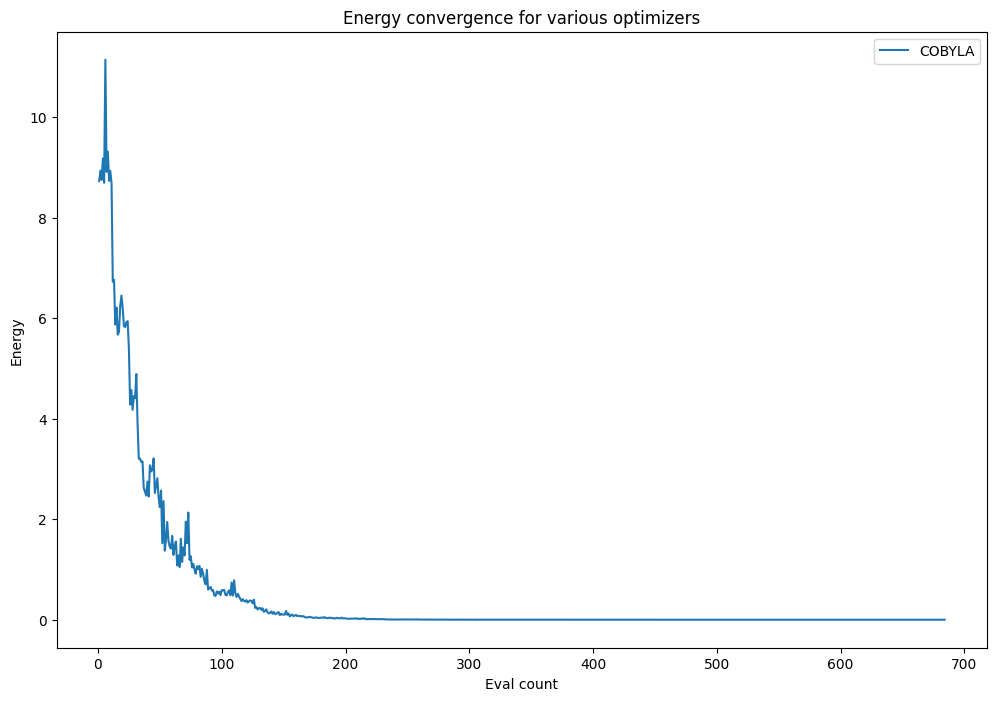

In [29]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

Text(0.5, 0, 'State Index')

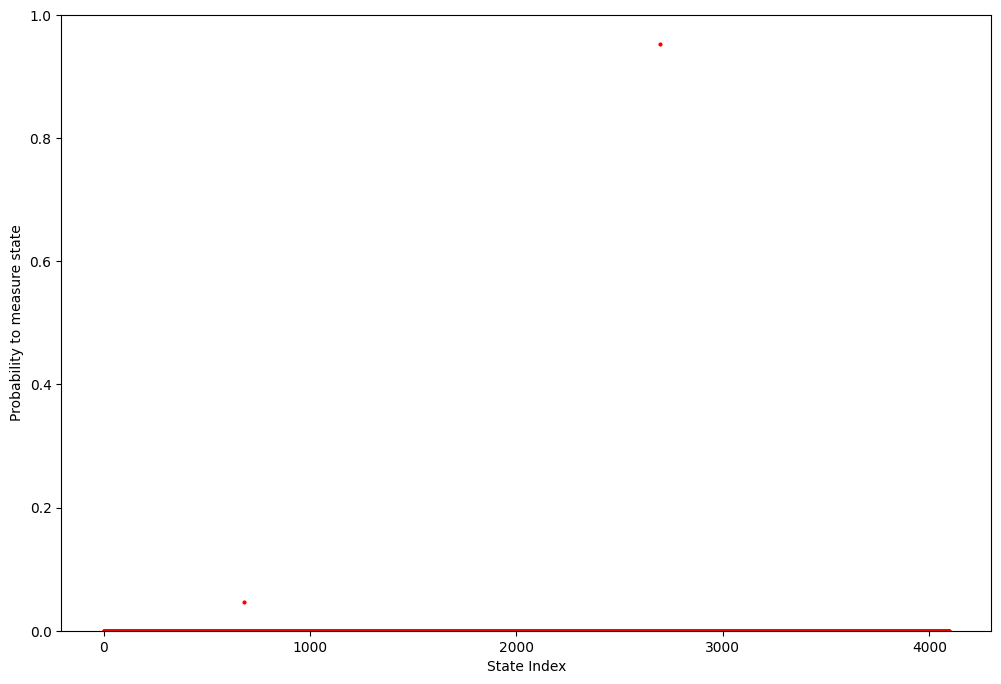

In [30]:
# Visualize the probabilities to obtain certain states given the optimal parameters

ansatz_plot = ansatz.assign_parameters(result.optimal_parameters)
state = Statevector(ansatz_plot)
plt.bar(np.arange(len(state)),(state.data**2).real)
#plt.xticks(np.arange(2**(NUM_PROJECTS*NUM_WORKERS*NUM_DIGITS)))# ,["|000>","|001>","|010>","|011>","|100>","|101>","|110>","|111>"])

for i, value in enumerate((state.data**2).real):
    plt.plot(i, value, marker='o', markersize=2, color='red')

plt.ylabel("Probability to measure state")
plt.xlabel("State Index")

In [31]:
def map_bitstring_to_matrix(res):
    binary_digits = bin(res)[2:]
    binary_digits = binary_digits.zfill(NUM_WORKERS*NUM_PROJECTS*NUM_DIGITS)
    print(binary_digits)
    res = [[0 for i in range(NUM_PROJECTS)] for j in range(NUM_WORKERS)]
    print(res)
    for i in range(NUM_WORKERS):
        for j in range(NUM_PROJECTS):
            for k in range(NUM_DIGITS):
                print((i,j,k),multi_base(i,j,k),binary_digits[multi_base(i,j,k)])
                res[i][j] = res[i][j] + int(binary_digits[multi_base(i,j,k)])*2**k
    return res


result_bit = map_bitstring_to_matrix(297)
# import pandas as pd

# df = pd.DataFrame(result_bit)
# print(df)

In [32]:
# np.argsort(state.data**2)[::-1]

In [33]:
# (state.data**2)[2694]

In [34]:
# np.sort(state.data**2)[::-1]

### Create the bound circuit to be used for all remote backend providers.

In [35]:
bound_c = result.optimal_circuit.decompose().bind_parameters(result.optimal_point)
bound_c.measure_all()
bound_c.draw()

┌────────────┐                                                     »
    q_0: ───┤ Ry(3.1416) ├───■──■─────■─────■────────■────────■───────────■────»
          ┌─┴────────────┴─┐ │  │     │     │        │        │           │    »
    q_1: ─┤ Ry(2.7164e-06) ├─■──┼──■──┼──■──┼─────■──┼─────■──┼────────■──┼────»
          └─┬────────────┬─┘    │  │  │  │  │     │  │     │  │        │  │    »
    q_2: ───┤ Ry(3.1416) ├──────■──■──┼──┼──┼──■──┼──┼──■──┼──┼─────■──┼──┼────»
            ├────────────┤            │  │  │  │  │  │  │  │  │     │  │  │    »
    q_3: ───┤ Ry(3.1416) ├────────────■──■──┼──■──┼──┼──┼──┼──┼──■──┼──┼──┼──■─»
           ┌┴────────────┤                  │     │  │  │  │  │  │  │  │  │  │ »
    q_4: ──┤ Ry(-6.2832) ├──────────────────■─────■──┼──■──┼──┼──■──┼──┼──┼──┼─»
           └┬────────────┤                           │     │  │     │  │  │  │ »
    q_5: ───┤ Ry(5.8334) ├───────────────────────────■─────■──┼─────■──┼──┼──■─»
            ├────────────┤                                    │        │  │    »
    q_6: ───┤ Ry(3.1416) ├────────────────────────────────────■────────■──┼────»
            ├────────────┤                                                │    »
    q_7: ───┤ Ry(3.1415) ├────────────────────────────────────────────────■────»
           ┌┴────────────┤                                                     »
    q_8: ──┤ Ry(-3.1416) ├─────────────────────────────────────────────────────»
          ┌┴─────────────┴─┐                                                   »
    q_9: ─┤ Ry(1.4919e-05) ├───────────────────────────────────────────────────»
         ┌┴────────────────┤                                                   »
   q_10: ┤ Ry(-5.3171e-05) ├───────────────────────────────────────────────────»
         └──┬────────────┬─┘                                                   »
   q_11: ───┤ Ry(4.4807) ├─────────────────────────────────────────────────────»
            └────────────┘                                                     »
meas: 12/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                  »
«    q_0: ───────■──────────────■──────────────■─────────────────■─»
«                │              │              │                 │ »
«    q_1: ────■──┼───────────■──┼───────────■──┼──────────────■──┼─»
«             │  │           │  │           │  │              │  │ »
«    q_2: ─■──┼──┼────────■──┼──┼────────■──┼──┼───────────■──┼──┼─»
«          │  │  │        │  │  │        │  │  │           │  │  │ »
«    q_3: ─┼──┼──┼─────■──┼──┼──┼─────■──┼──┼──┼────────■──┼──┼──┼─»
«          │  │  │     │  │  │  │     │  │  │  │        │  │  │  │ »
«    q_4: ─┼──┼──┼──■──┼──┼──┼──┼──■──┼──┼──┼──┼─────■──┼──┼──┼──┼─»
«          │  │  │  │  │  │  │  │  │  │  │  │  │     │  │  │  │  │ »
«    q_5: ─┼──┼──┼──■──┼──┼──┼──┼──┼──┼──┼──┼──┼──■──┼──┼──┼──┼──┼─»
«          │  │  │     │  │  │  │  │  │  │  │  │  │  │  │  │  │  │ »
«    q_6: ─■──┼──┼─────■──┼──┼──┼──■──┼──┼──┼──┼──■──┼──┼──┼──┼──┼─»
«             │  │        │  │  │     │  │  │  │     │  │  │  │  │ »
«    q_7: ────■──┼────────■──┼──┼─────■──┼──┼──┼─────■──┼──┼──┼──┼─»
«                │           │  │        │  │  │        │  │  │  │ »
«    q_8: ───────■───────────■──┼────────■──┼──┼────────■──┼──┼──┼─»
«                               │           │  │           │  │  │ »
«    q_9: ──────────────────────■───────────■──┼───────────■──┼──┼─»
«                                              │              │  │ »
«   q_10: ─────────────────────────────────────■──────────────■──┼─»
«                                                                │ »
«   q_11: ───────────────────────────────────────────────────────■─»
«                                                                  »
«meas: 12/═════════════════════════════════════════════════════════»
«                              

### We need to format the exported OpenQASM to remove IBM specific input so it can be executed on other backends.

In [36]:
def get_qasm_from_bound_c(bound_c):
    circuit = 'OPENQASM 2.0;\n'
    # Use lines after line 3 so we skip over the ibm import and use the rest
    # and also remove any barrier lines since they are only used for display and do not interfere with the circuit
    circuit += '\n'.join([line for line in bound_c.qasm().splitlines()[2:] 
                          if not line.startswith('barrier')])
    return circuit

## Execution on remote backends <a id="remote-backends"></a>

### IBM Quantum <a id="ibm-backend"></a>

### Prerequisites 

To execute the job on IBM backend an account is required to be created for valid credentials on [quantum.ibm](https://quantum.ibm.com/)

#### install requirements for the IBM backend

In [37]:
os.system('pipenv install --categories ibm-backend')

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.


Installing dependencies from Pipfile.lock (8b6187)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


0

### Set the backend token required from the valid account setup on quantum IBM.
In a `.env` file in the root of the project set the required variable

```bash
IBM_BACKEND_TOKEN="YOUR_TOKEN_HERE"
```

In [38]:
from dotenv import load_dotenv

load_dotenv()
IBM_BACKEND_TOKEN = os.environ.get('IBM_BACKEND_TOKEN')

#### Import requirements

In [39]:
from qiskit_ibm_runtime import Options, QiskitRuntimeService, Sampler

service = QiskitRuntimeService(channel="ibm_quantum",
                               token=IBM_BACKEND_TOKEN)
options = Options(optimization_level=1)

# Get the least busy backend
backend = service.least_busy(simulator=False, operational=True)

# Execute the circuit
sampler = Sampler(backend=backend, options=options)
job = sampler.run(circuits=bound_c, shots=100)
print(job.result())

### Validate the execution result

Text(1703, 0.033, 'Max: 2694.00 \n |101010000110>')

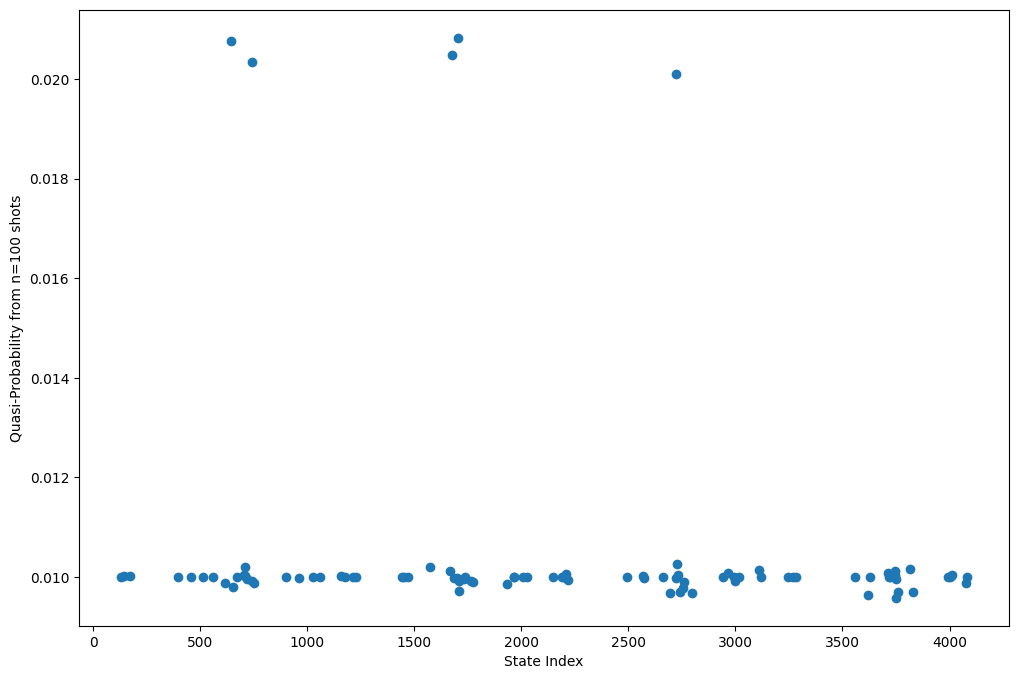

In [ ]:
import operator

sorted_dict = dict(sorted(job.result().quasi_dists[0].items(), key=operator.itemgetter(1)))
y_plot = np.array(list(sorted_dict.values()))[::-1]
x_plot = np.array(list(sorted_dict.keys()))[::-1]
plt.scatter(x_plot,y_plot)
plt.xlabel("State Index")
plt.ylabel("Quasi-Probability from n=100 shots")
plt.annotate(f'Max: {2694:.2f}'+" \n |101010000110>", xy=(x_plot[0], 0.042), xytext=(x_plot[0] + 1, 0.033),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
             fontsize=18,
             )

In [ ]:
d = job.result().quasi_dists[0]

max(d, key=d.get)

1702

In [ ]:
(state.data**2)[2694]

(0.9530194987466041-0j)

In [ ]:
result_bit = map_bitstring_to_matrix(2694)
import pandas as pd

df = pd.DataFrame(result_bit)
print(df)

### AWS Braket <a id="aws-backend"></a>

#### Prerequisites

To execute the job on AWS Braket the service needs to be properly [enabled](https://docs.aws.amazon.com/braket/latest/developerguide/braket-enable-overview.html). 

To be able to submit the job we also need to have [aws cli](https://aws.amazon.com/cli/) properly [installed](https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html) and properly [configured](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html) for access. Also the [aws-toolkit](https://marketplace.visualstudio.com/items?itemName=AmazonWebServices.aws-toolkit-vscode) needs to be installed and a profile needs to be chosen that corresponds with the active profile that provides access to the properly configured AWS Braket service.

#### install requirements for the AWS Braket backend

In [ ]:
os.system('pipenv install --categories aws-backend')

AWS OpenQASM is not absolutelly compatible with IBM OpenQASM that gets exported from the bound circuit so we need to tweak the circuit a little to execute on AWS.

In [ ]:
def to_aws_compatible_qasm(bound_c):
    def to_aws_qasm(line):
        gates = {'p(': 'phaseshift(',
                 'cx ': 'cnot '}
        for original, replacement in gates.items():
            if line.startswith(original):
                return line.replace(original, replacement)
        return line 
    return ''.join([to_aws_qasm(line) for line in get_qasm_from_bound_c(bound_c)])

#### Set active profile name with access to Braket and region
In a `.env` file in the root of the project set the required variable

```bash
BRAKET_PROFILE="Braket-Admin"
BRAKET_REGION="eu-west-2"
```

In [ ]:
from dotenv import load_dotenv
load_dotenv()
BRAKET_PROFILE = os.environ.get('BRAKET_PROFILE')
BRAKET_REGION = os.environ.get('BRAKET_REGION')

In [ ]:
from boto3 import Session
from braket.aws import AwsDevice, AwsSession
from braket.ir.openqasm import Program

# Construct the required braket session from a boto session
aws_session = AwsSession(boto_session=Session(profile_name=BRAKET_PROFILE, 
                                              region_name=BRAKET_REGION))
# We are going to use sv1 remote simulator as that is the only one compatible with our circuit (gate based)
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1", aws_session=aws_session)

In [ ]:
# Create a program with the OpenQASM source and execute of the remote
program = Program(source=get_qasm_from_bound_c(bound_c))
result = device.run(program, shots=10)
# Print the remote executed task id
print(result)
# The result of the run can be retrieved from the configured s3 backet of the Braket service
# by following the quantum task information on the quantum tasks tab of the the braket service.

AwsQuantumTask('id/taskArn':'arn:aws:braket:eu-west-2:758793629524:quantum-task/65df6d7b-8764-4b31-825b-694dad76c599')


### Quantum Inspire <a id="inspire-backend"></a>

#### Prerequisites

To execute the job on Quantum inspire backend an account is required to be created for valid credentials on [quantum-inspire](https://www.quantum-inspire.com/)

#### Install requirements for the Inspire backend

In [ ]:
os.system('pipenv install --categories inspire-backend')

### Set the backend variables required from the valid account setup on quantum inspire.

In a .env file in the root of the project set the required variable
```bash
INSPIRE_TOKEN='YOUR_TOKEN_HERE'
```


In [ ]:
# Created by authenticating in the service and going to (account)[https://www.quantum-inspire.com/account]
from dotenv import load_dotenv
load_dotenv()
INSPIRE_TOKEN=os.environ.get('INSPIRE_TOKEN')
INSPIRE_DEVICE_ID = 'QX-34-L' # The only backend that can run our job, a simulator.
INSPIRE_SERVER_URL = r'https://api.quantum-inspire.com'

In [ ]:
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.credentials import enable_account, get_authentication

enable_account(INSPIRE_TOKEN)

qi = QuantumInspireAPI(INSPIRE_SERVER_URL, get_authentication(), INSPIRE_DEVICE_ID)

backend_type = qi.get_backend_type_by_name(INSPIRE_DEVICE_ID)
result = qi.execute_qasm(get_qasm_from_bound_c(bound_c), backend_type=backend_type, number_of_shots=100)
print(result)

#### The inspire backend is not really supported and probably not functioning at all